### 1. Baseball Data

#### For: Group operations

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
# Importa
baseball = pd.read_csv("http://bit.ly/144sh7t")

In [ ]:
Batting Table
playerID       Player ID code
yearID         Year
stint          player's stint (order of appearances within a season)
teamID         Team
lgID           League
G              Games
AB             At Bats
R              Runs
H              Hits
2B             Doubles
3B             Triples
HR             Homeruns
RBI            Runs Batted In
SB             Stolen Bases
CS             Caught Stealing
BB             Base on Balls
SO             Strikeouts
IBB            Intentional walks
HBP            Hit by pitch
SH             Sacrifice hits
SF             Sacrifice flies
GIDP           Grounded into double plays

TASK 1. Convert the date column into a pandas datetime object

In [58]:
baseball.year.head()

0    1871
1    1871
2    1871
3    1871
4    1871
Name: year, dtype: int64

In [61]:
baseball.loc[:, 'year'] = pd.to_datetime(baseball['year'], format='%Y')

In [33]:
# Columns and types
baseball.columns.to_series().groupby(baseball.dtypes).groups

{dtype('<M8[ns]'): ['year'],
 dtype('int64'): ['stint', 'g', 'ab', 'r', 'h', 'X2b', 'X3b', 'hr', 'bb'],
 dtype('float64'): ['rbi', 'sb', 'cs', 'so', 'ibb', 'hbp', 'sh', 'sf', 'gidp'],
 dtype('O'): ['id', 'team', 'lg']}

In [34]:
baseball.get_dtype_counts()

datetime64[ns]    1
float64           9
int64             9
object            3
dtype: int64

In [13]:
# Dimensions
baseball.shape

(21699, 22)

In [17]:
# Rows with missing data
baseball.shape[0] - baseball.dropna().shape[0]

7534

In [25]:
# group by year and get the mean of each numeric column
(baseball
 .groupby(["year"])
 .mean()[:5]
 .transpose())

year,1871,1872,1873,1874,1875
stint,1.000000,1.153846,1.000000,1.066667,1.058824
g,28.000000,29.461538,46.307692,49.000000,57.823529
ab,135.857143,140.846154,217.615385,226.733333,256.941176
r,33.571429,32.153846,48.461538,44.000000,47.176471
h,42.142857,42.923077,68.538462,64.866667,73.294118
X2b,6.000000,4.307692,7.769231,6.800000,9.882353
X3b,4.000000,1.307692,2.769231,2.933333,3.529412
hr,1.000000,0.076923,0.538462,0.866667,0.764706
rbi,22.285714,20.538462,30.923077,29.000000,31.588235
sb,3.857143,1.538462,1.692308,3.333333,5.705882


In [26]:
# getting the count of rows for each league
(baseball
 .groupby("lg")
 .size()
 .sort_values(ascending=False))

lg
NL    11378
AL    10007
AA      171
FL       37
PL       32
UA        9
dtype: int64

In [27]:
# records per year
(baseball
 .groupby(["year"])
 .size()
 .tail())

year
2003    216
2004    187
2005    160
2006    141
2007     92
dtype: int64

In [35]:
# rows and columns per league
def analyze(df):
    return pd.Series({"nrow": len(df), "ncol": len(df.columns)})

baseball.groupby("lg").apply(analyze)

,ncol,nrow
lg,,
AA,22,171
AL,22,10007
FL,22,37
NL,22,11378
PL,22,32
UA,22,9


In [36]:
# OR use an anonymous function
(baseball
 .groupby('lg')
 .apply(lambda x: pd.Series({'nrow': len(x), 'ncol': len(x.columns)}))
)

,ncol,nrow
lg,,
AA,22,171
AL,22,10007
FL,22,37
NL,22,11378
PL,22,32
UA,22,9


In [62]:
baseball['Year'] = baseball['year'].dt.year

In [63]:
# aggregate over year and get mean RBIs per year
mean_rbis = baseball.groupby("Year")['rbi'].mean()

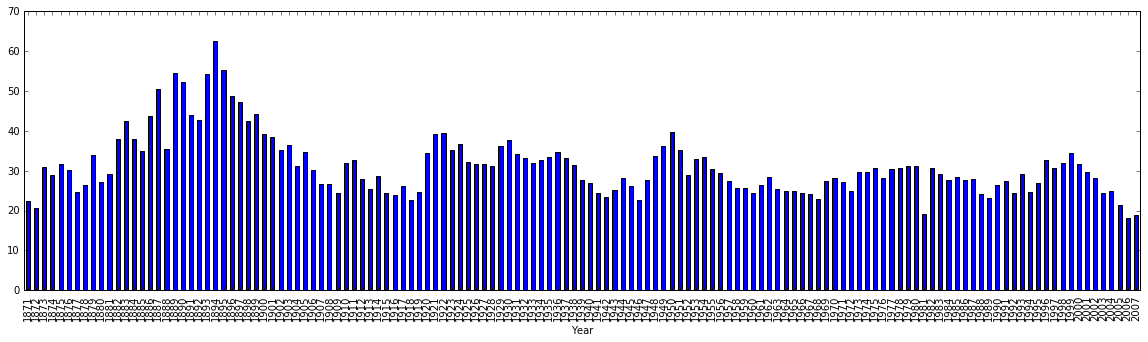

In [67]:
mean_rbis.plot.bar(figsize=(20, 5))

## Mean, Median experience of players participating in each year

Year     Mean_Exp    Median_Exp
1970        8
1971        8
1972        6
...
2003
2004
2005

The experience of a player is (current year - debut year)

In [110]:
def years_played_to_date(player):
    player['years_to_date'] = player.Year - np.min(player.Year) + 1
    return player
 
# for each player, calculate the number of years played
players = baseball.groupby("id").apply(years_played_to_date)

In [117]:
import seaborn as sns

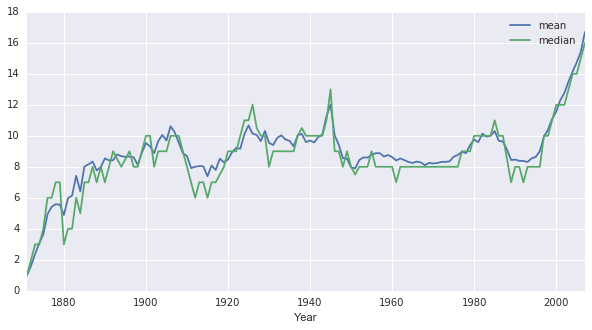

In [118]:
# get the mean and median years played and plot it
(players
 .groupby("Year")
 .agg([np.mean, np.median])
 .years_to_date
 .plot(figsize=(10, 5))
)

TASK 2. Use the following code to produce the same output as above.

In [95]:
debuts = baseball[['id', 'Year']].sort_values(by=['id', 'Year']).groupby('id').first()

def median_exp(yr):
    players_active = baseball.loc[baseball['Year'] == yr, ['id', 'Year']].set_index('id')
    
    return (pd.merge(debuts, players_active, how='inner', right_index=True, left_index=True)
            .assign(Exper = lambda x: x.Year_y - x.Year_x)
            .loc[:, 'Exper']
            .median())

Series(map(lambda x: median_exp(x), range(1880, 2005))).plot(figsize=(10, 5))

---
# 2. Iris Data 

#### For categoricals, reshaping

In [148]:
from sklearn.datasets import load_iris
iris = load_iris()

print iris.feature_names
print '\n', iris.target_names

df = pd.DataFrame(iris.data, columns=iris.feature_names)

print '\n', df.shape
print '\n', df.columns

df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

['setosa' 'versicolor' 'virginica']

(150, 4)

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [153]:
# convert centimeters to millimeters
df.applymap(lambda x: x*10)[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,51.0,35.0,14.0,2.0
1,49.0,30.0,14.0,2.0
2,47.0,32.0,13.0,2.0
3,46.0,31.0,15.0,2.0
4,50.0,36.0,14.0,2.0


Pandas categoricals are distinct from 'Object' Series.
These were introduced in Pandas 0.17

In [154]:
pd.Categorical?

In [158]:
# Create new columns
df['id'] = np.arange(0, len(df))

x = pd.Categorical(iris.target)
x.categories = iris.target_names

df['species'] = x
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),id,species,species_2
0,5.1,3.5,1.4,0.2,0,setosa,NaN
1,4.9,3.0,1.4,0.2,1,setosa,NaN
2,4.7,3.2,1.3,0.2,2,setosa,NaN
3,4.6,3.1,1.5,0.2,3,setosa,NaN
4,5.0,3.6,1.4,0.2,4,setosa,NaN


In [161]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [173]:
df.set_index(['id', 'species']).stack().reset_index().head()

,id,species,level_2,0
0,0,setosa,sepal length (cm),5.1
1,0,setosa,sepal width (cm),3.5
2,0,setosa,petal length (cm),1.4
3,0,setosa,petal width (cm),0.2
4,1,setosa,sepal length (cm),4.9


In [174]:
pd.melt(df, id_vars=['id', 'species']).head()

,id,species,variable,value
0,0,setosa,sepal length (cm),5.1
1,1,setosa,sepal length (cm),4.9
2,2,setosa,sepal length (cm),4.7
3,3,setosa,sepal length (cm),4.6
4,4,setosa,sepal length (cm),5.0


In [175]:
pd.melt?

In [ ]:
# Converting from wide-to-long format
from pandas.core.reshape import melt, pivot
melt(df, id_vars=['id', 'species'])[:6]

---
# 3. Slaughter Data

#### For: `pandas` Plotting!

In [176]:
from dateutil.parser import parse
 
# monthly slaughter records since 1921
df = pd.read_csv("http://bit.ly/119792b")

print df.shape
print df.head()

# parse the data (we could also use pd.to_datetime)
df.date = pd.to_datetime(df.date)

print df.dtypes

(827, 8)
                  date   beef   veal    pork  lamb_and_mutton  broilers  \
0  1944-01-01 00:00:00  751.0   85.0  1280.0             89.0       NaN   
1  1944-02-01 00:00:00  713.0   77.0  1169.0             72.0       NaN   
2  1944-03-01 00:00:00  741.0   90.0  1128.0             75.0       NaN   
3  1944-04-01 00:00:00  650.0   89.0   978.0             66.0       NaN   
4  1944-05-01 00:00:00  681.0  106.0  1029.0             78.0       NaN   

   other_chicken  turkey  
0            NaN     NaN  
1            NaN     NaN  
2            NaN     NaN  
3            NaN     NaN  
4            NaN     NaN  
date               datetime64[ns]
beef                      float64
veal                      float64
pork                      float64
lamb_and_mutton           float64
broilers                  float64
other_chicken             float64
turkey                    float64
dtype: object


In [177]:
print df.count()
df.describe()

date               827
beef               827
veal               827
pork               827
lamb_and_mutton    827
broilers           635
other_chicken      143
turkey             635
dtype: int64


/Users/lr/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,NaN,NaN,NaN
50%,1853.000000,40.000000,1156.000000,31.000000,NaN,NaN,NaN
75%,2070.000000,79.000000,1466.000000,55.000000,NaN,NaN,NaN
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


## Detect and treat missing data

In [179]:
# sort the data frame by date
df = df.sort(['date'])

print df.date.head()

# Check nulls
df.apply(lambda x: x.isnull().value_counts()).loc[False, :]

0   1944-01-01
1   1944-02-01
2   1944-03-01
3   1944-04-01
4   1944-05-01
Name: date, dtype: datetime64[ns]


/Users/lr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


date               827.0
beef               827.0
veal               827.0
pork               827.0
lamb_and_mutton    827.0
broilers           635.0
other_chicken      143.0
turkey             635.0
dtype: float64

In [180]:
df.date.notnull().value_counts()

True    827
Name: date, dtype: int64

In [181]:
# fill months without data with 0s
df = df.fillna(0)

print df.dropna().shape[0]

827


#### Making Boxplots

In [187]:
# create an index
df.index = df.date.dt.year

In [188]:
df.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,,
1944,1944-01-01,751.0,85.0,1280.0,89.0,0.0,0.0,0.0
1944,1944-02-01,713.0,77.0,1169.0,72.0,0.0,0.0,0.0
1944,1944-03-01,741.0,90.0,1128.0,75.0,0.0,0.0,0.0
1944,1944-04-01,650.0,89.0,978.0,66.0,0.0,0.0,0.0
1944,1944-05-01,681.0,106.0,1029.0,78.0,0.0,0.0,0.0


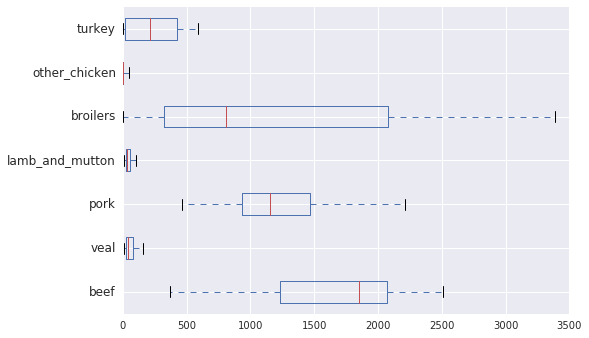

In [189]:
# Making Boxplots using DataFrame methods
df.boxplot(return_type='axes', vert=False)

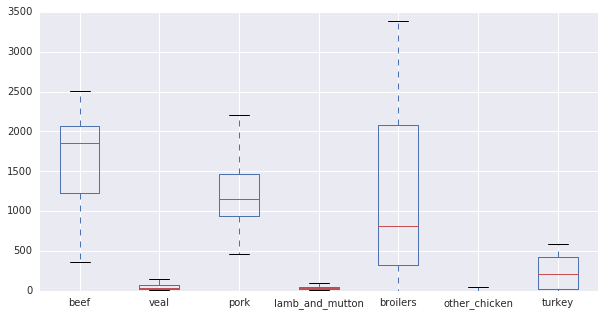

In [190]:
# Also
df.plot(kind='box', figsize=(10, 5))

#### Making Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1213aa9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12205ef50>]], dtype=object)

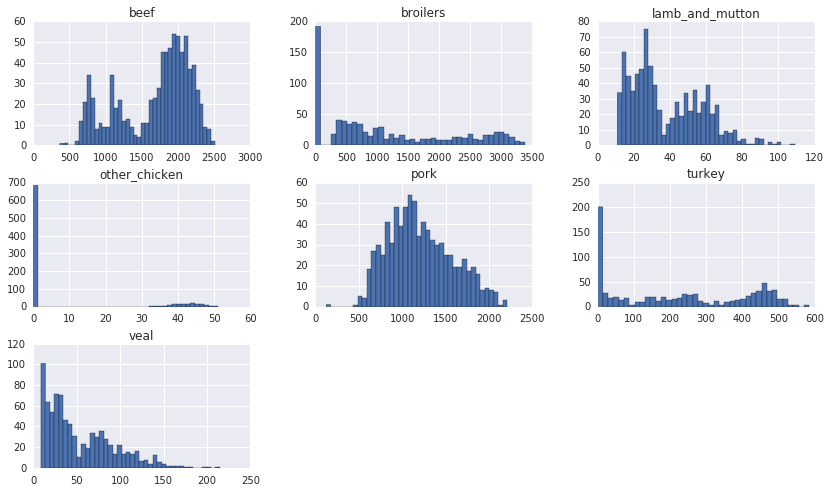

In [193]:
df.hist(bins=40, figsize=(14,8))

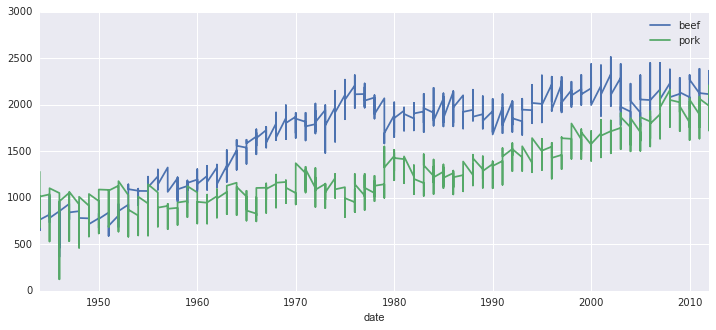

In [200]:
df[['beef', 'pork']].plot(kind='line', figsize=(12, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1268cce90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126bdf790>]], dtype=object)

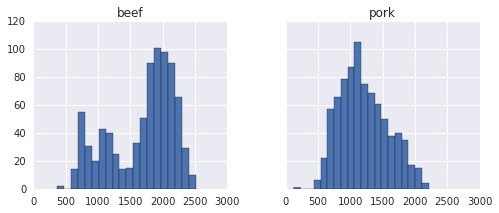

In [196]:
df[['beef', 'pork']].hist(bins=20, sharey=True, sharex=True, figsize=(8, 3))

NameError: name 'tight_layour' is not defined

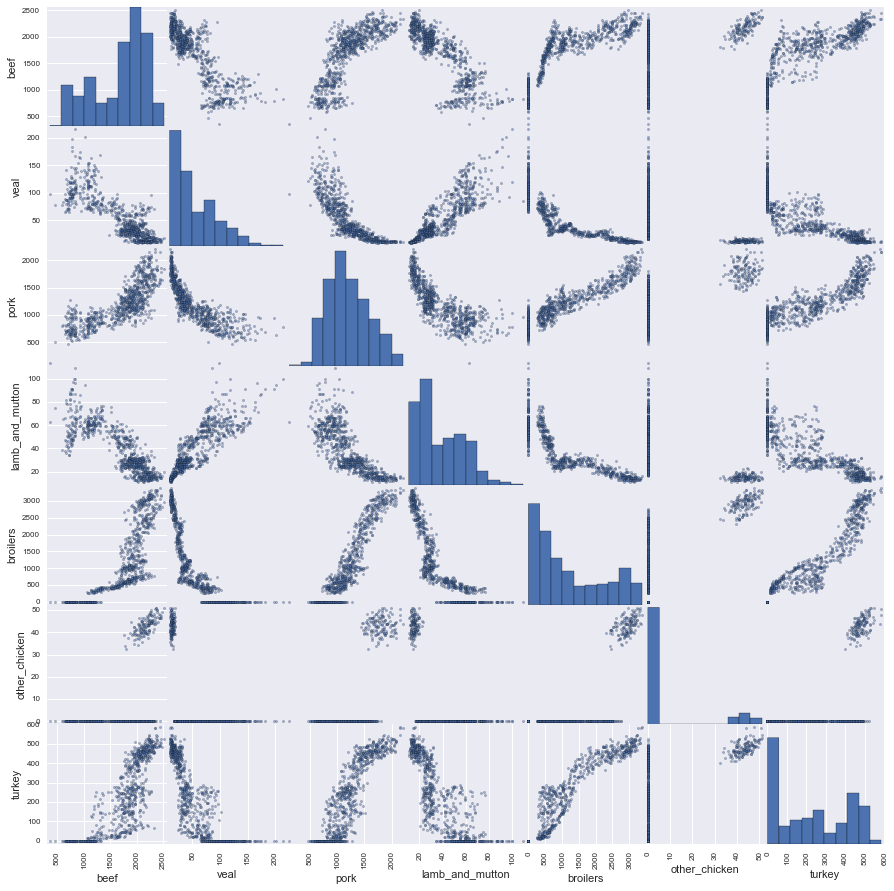

In [204]:
pd.scatter_matrix(df, figsize=(15, 15))
tight_layour()